### Step 1:We import the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


### Step 2: We read the data after organizing it in Excel 

In [3]:
header_list = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
data = pd.read_csv('data.csv')
data.to_csv("data.csv", header=header_list, index=False)
data.head(15)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
5,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
6,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
7,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
8,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl
9,NaN,4,133.0,115.0,3090,17.5,70,2,citroen ds-21 pallas


### Step 3: We check to see if the features we need to perform the regression task are ints/floats

In [4]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [5]:
#Deleted the car name column as we won't be needing it for this task.
data = data.drop('car name', axis = 1)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,15.0,8,350.0,165.0,3693,11.5,70,1
1,18.0,8,318.0,150.0,3436,11.0,70,1
2,16.0,8,304.0,150.0,3433,12.0,70,1
3,17.0,8,302.0,140.0,3449,10.5,70,1
4,15.0,8,429.0,198.0,4341,10.0,70,1


## Step 4: We check to see if we have nan values and we deal with them

In [6]:
data.isna().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

C:\Users\andrei\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

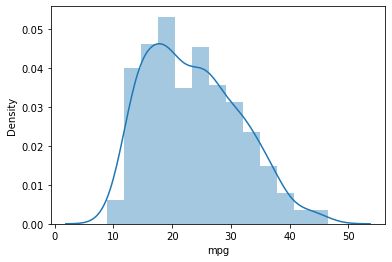

In [7]:
sns.distplot(data['mpg'])  # From the distribution we notice a positive skew so we will deal with the values using median method!

In [8]:
data.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,15.0,8,350.0,165.0,3693,11.5,70,1
1,18.0,8,318.0,150.0,3436,11.0,70,1
2,16.0,8,304.0,150.0,3433,12.0,70,1
3,17.0,8,302.0,140.0,3449,10.5,70,1
4,15.0,8,429.0,198.0,4341,10.0,70,1


In [9]:
mpg = data.iloc[:,0]
mpg = mpg.fillna(mpg.median(),inplace = True)
data.head(30)
data['mpg'].isna().sum()


0

In [10]:
horsepower = data.iloc[:,3]
horsepower = horsepower.fillna(horsepower.median(),inplace = True)
data.tail(30)
data['horsepower'].isna().sum()

0

In [11]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [12]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

### Luckily, we no longer have missing values and all of our attributes are either float or int.We can now move on 
## Step 5: Dealing with the cathegorical column!

In [13]:
data.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,15.0,8,350.0,165.0,3693,11.5,70,1
1,18.0,8,318.0,150.0,3436,11.0,70,1
2,16.0,8,304.0,150.0,3433,12.0,70,1
3,17.0,8,302.0,140.0,3449,10.5,70,1
4,15.0,8,429.0,198.0,4341,10.0,70,1
5,14.0,8,454.0,220.0,4354,9.0,70,1
6,14.0,8,440.0,215.0,4312,8.5,70,1
7,14.0,8,455.0,225.0,4425,10.0,70,1
8,15.0,8,390.0,190.0,3850,8.5,70,1
9,23.0,4,133.0,115.0,3090,17.5,70,2


In [14]:
#data['origin'].replace({1 : 'Europe', 2: 'America', 3:'Asia'},inplace = True)
#data.head()
#data = pd.get_dummies(data, columns = ['origin'])
data.head(5)   #<- we have succesfully separated the cathegorical data!

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,15.0,8,350.0,165.0,3693,11.5,70,1
1,18.0,8,318.0,150.0,3436,11.0,70,1
2,16.0,8,304.0,150.0,3433,12.0,70,1
3,17.0,8,302.0,140.0,3449,10.5,70,1
4,15.0,8,429.0,198.0,4341,10.0,70,1


## Step 6: Building the model --> the function will be something like this:
####  y = m1*x1 + m2*x2 + ... +m9*x9 + c, where m1,m2,...,m9 are the coefficients and c is the intercept of the function

In [15]:
X = data.drop(['mpg'], axis = 1)
y = data['mpg']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 1)


regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

                            

LinearRegression()

In [16]:
regression_model.coef_    # <- these are the coefficients of our features(m1,m2,m3,...,mi)

array([-0.14764119,  0.01534131, -0.01525557, -0.00661794,  0.05561394,
        0.69247404,  1.2874038 ])

In [17]:
regression_model.intercept_   # <- this is the intercep(c)

-12.734109226218397

In [18]:
regression_model.score(X_train,y_train)  # <-- the score of the in-sample data

0.802649758529558

In [19]:
regression_model.score(X_test,y_test)  # <-- the score of the out of sample data

0.7788730681056804

## Step 7: Conclusions

## We notice that the score of the training data is decent(80%),
## however the score of the test data is slightly unpleasing(78%)
## and that is due to the fact that i converted the missing mpg to  median values, thus causing the test score to be only 78%.